In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../dataset/dataset_train.csv")

# Clean data

In [254]:

remove_columns = [
    "Index", "First Name", "Last Name", "Birthday", "Best Hand",
    "Potions", "Care of Magical Creatures", "Charms", "Flying",
    "Defense Against the Dark Arts","Arithmancy"
]
data.drop(columns=remove_columns, inplace=True)
data
test = data

# Deal with missing data

Claude recommandation:
- Missing data is only ~2% (very small)
- Standard deviation is extremely high (suggests outliers)

Use MEDIAN imputation 

Note:
Mean (Average) -  Sum of all values divided by the count
Median - The middle value when data is sorted

✅ Median works well for BOTH low and high std
✅ Mean works well ONLY for low std (and normal distribution)

In [255]:
data.describe()

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration
count,1568.000000,1567.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000
mean,39.797131,1.141020,3.153910,-224.589915,495.747970,2.963095,1030.096946
std,520.298268,5.219682,4.155301,486.344840,106.285165,4.425775,44.125116
min,-966.740546,-10.295663,-8.727000,-1086.496835,283.869609,-8.858993,906.627320
25%,-489.551387,-4.308182,3.099000,-577.580096,397.511047,2.218653,1026.209993
50%,260.289446,3.469012,4.624000,-419.164294,463.918305,4.378176,1045.506996
75%,524.771949,5.419183,5.667000,254.994857,597.492230,5.825242,1058.436410
max,1016.211940,11.612895,10.032000,1092.388611,745.396220,11.889713,1098.958201


In [256]:
for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        data[col] = data[col].fillna(data[col].median())

data.describe()
test = data

# Convert Category into numerical representation 
## (Using One-Hot Encoding)

In [257]:
houses = list(set(data["Hogwarts House"]))
lookup = {}

for i,h in enumerate(houses):
    lookup[h] = i

# Create one-hot encoded matrix
one_hot = np.zeros((len(data), len(houses)), dtype=np.uint8)

for i in range(len(data)):
    house = data["Hogwarts House"].iloc[i]
    one_hot[i, lookup[house]] = 1

# Convert to DataFrame with proper column names
one_hot_df = pd.DataFrame(one_hot, columns=houses, index=data.index)

# Insert after 'Hogwarts House' column
house_col_index = data.columns.get_loc("Hogwarts House")

# Split dataframe and insert one-hot columns
data = pd.concat([
    data.iloc[:, :house_col_index + 1],  # Up to and including 'Hogwarts House'
    one_hot_df,                           # One-hot encoded columns
    data.iloc[:, house_col_index + 1:]   # Rest of the columns
], axis=1)


data.drop('Hogwarts House', axis=1, inplace=True)
data

,Gryffindor,Hufflepuff,Slytherin,Ravenclaw,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration
0,0,0,0,1,-487.886086,5.727180,4.722,272.035831,532.484226,5.231058,1039.788281
1,0,0,1,0,-552.060507,-5.987446,-5.612,-487.340557,367.760303,4.107170,1058.944592
2,0,0,0,1,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348
3,1,0,0,0,697.742809,-6.497214,4.026,-537.001128,523.982133,-4.809637,920.391449
4,1,0,0,0,436.775204,-7.820623,2.236,-444.262537,599.324514,-3.444377,937.434724
...,...,...,...,...,...,...,...,...,...,...,...
1595,1,0,0,0,354.280086,-4.541837,5.702,-497.235066,618.220213,-5.231721,964.219853
1596,0,0,1,0,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366
1597,1,0,0,0,544.018925,-3.203269,6.065,-385.150457,635.211486,-5.984257,953.866685
1598,0,1,0,0,453.676219,3.442831,6.738,-831.741123,383.444937,3.813111,1087.949205


# Feature normalization (Z-Score / Standard Scaling)

In [258]:
courses = data.columns[4:]

means = []
stds = []

for course in courses:
    mean = data[course].mean()
    std = data[course].std()

    means.append(mean)
    stds.append(std)

    data[course] = (data[course] - mean) / std

data

,Gryffindor,Hufflepuff,Slytherin,Ravenclaw,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration
0,0,0,0,1,-1.031207,0.876745,0.372760,1.039531,0.355760,0.510065,0.214227
1,0,0,1,0,-1.155578,-1.386456,-2.141244,-0.536479,-1.209780,0.252992,0.652486
2,0,0,0,1,-0.795137,1.262716,0.717724,1.854869,1.022001,0.126823,1.319238
3,1,0,0,0,1.266566,-1.484941,0.203440,-0.639545,0.274955,-1.786600,-2.517338
4,1,0,0,0,0.760805,-1.740616,-0.232022,-0.447075,0.991011,-1.474316,-2.127422
...,...,...,...,...,...,...,...,...,...,...,...
1595,1,0,0,0,0.600928,-1.107173,0.611169,-0.557015,1.170596,-1.883146,-1.514630
1596,0,0,1,0,0.626609,0.941249,-0.348551,-0.860098,-0.467827,-0.174528,0.588491
1597,1,0,0,0,0.968646,-0.848569,0.699478,-0.324394,1.332081,-2.055278,-1.751491
1598,0,1,0,0,0.793560,0.435421,0.863202,-1.251249,-1.060713,0.185730,1.316054


Ensure Vector shape is correct

- n = number of feature = 7
- m = rows of data = 1600

- W (n x 1) = (7 x 1)
- b single parameter
- X (n x m) = (7 x 1600)
- Y (1 x m) = (1 x 1600)

In [259]:
def model(W, b, X):
    z = np.dot(W, X) + b 
    return 1 / (1 + np.exp(-z))

def loss(y_predict, Y, m):
    # Add small epsilon to avoid log(0)
    epsilon = 1e-15
    y_predict = np.clip(y_predict, epsilon, 1 - epsilon)
    return -(1/m) * np.sum(Y * np.log(y_predict) + (1 - Y)*np.log(1-y_predict))

def gradient_w(y_predict, Y, X, m):
    return (1/m) * np.dot((y_predict - Y), X.T)  # Fixed sign

def gradient_b(y_predict, Y, m):
    return (1/m) * np.sum(y_predict - Y)  # Fixed sign

def train(X, Y, learn_rate = 0.1, iteration=1000000, converge_limit = 0.00001):
    b = 0.0
    W = np.zeros(7)
    m = len(Y)
    cost = []

    for i in range(iteration):
        if i % 100 == 0:
            print(f"Iteration = {i}, Cost = {cost[-1] if cost else 'N/A'}")
            print(f"W norm: {np.linalg.norm(W):.6f}, b: {b:.6f}")
            print("----------------------------------------")

        y_predict = model(W, b, X)
        current_cost = loss(y_predict, Y, m)
        cost.append(current_cost)

        gW = gradient_w(y_predict, Y, X, m)
        gb = gradient_b(y_predict, Y, m)

        # Store previous values for convergence check
        W_prev = W.copy()
        b_prev = b

        W = W - learn_rate * gW
        b = b - learn_rate * gb

        # Check if change is small
        if (np.all(np.abs(W - W_prev) <= converge_limit) and 
            np.abs(b - b_prev) <= converge_limit):
            print(f"Loss Function converged at iter = {i} 👍")
            return W, b, cost
    
    print(f"Training stopped at iter = {i}. Didn't converge")
    return W, b, cost


In [260]:
x_train = np.array(data.iloc[:, 4:])
x_train = x_train.T


y_train_Gryffindor = np.array(data["Gryffindor"])
y_train_Hufflepuff = np.array(data["Hufflepuff"])
y_train_Slytherin = np.array(data["Slytherin"])
y_train_Ravenclaw = np.array(data["Ravenclaw"])

W1, b1, cost1 = train(x_train, y_train_Gryffindor)


Iteration = 0, Cost = N/A
W norm: 0.000000, b: 0.000000
----------------------------------------
Iteration = 100, Cost = 0.1013201845387073
W norm: 1.547735, b: -1.251745
----------------------------------------
Iteration = 200, Cost = 0.07140851660664187
W norm: 1.872545, b: -1.672736
----------------------------------------
Iteration = 300, Cost = 0.06184207183514058
W norm: 2.039223, b: -1.927501
----------------------------------------
Iteration = 400, Cost = 0.057332920326725906
W norm: 2.143101, b: -2.109004
----------------------------------------
Iteration = 500, Cost = 0.0547759852620092
W norm: 2.214213, b: -2.248865
----------------------------------------
Iteration = 600, Cost = 0.05315544595028158
W norm: 2.265835, b: -2.361728
----------------------------------------
Iteration = 700, Cost = 0.05204795946845747
W norm: 2.304954, b: -2.455602
----------------------------------------
Iteration = 800, Cost = 0.051248379494376994
W norm: 2.335658, b: -2.535367
----------------

In [261]:
W2, b2, cost2 = train(x_train, y_train_Hufflepuff)


Iteration = 0, Cost = N/A
W norm: 0.000000, b: 0.000000
----------------------------------------
Iteration = 100, Cost = 0.12577338309335534
W norm: 1.880183, b: -0.774758
----------------------------------------
Iteration = 200, Cost = 0.09001570153723507
W norm: 2.379118, b: -1.075127
----------------------------------------
Iteration = 300, Cost = 0.07815987694176096
W norm: 2.657673, b: -1.269860
----------------------------------------
Iteration = 400, Cost = 0.07242114175233011
W norm: 2.845062, b: -1.415370
----------------------------------------
Iteration = 500, Cost = 0.06910757212200877
W norm: 2.983061, b: -1.531611
----------------------------------------
Iteration = 600, Cost = 0.06698591976525248
W norm: 3.090409, b: -1.628129
----------------------------------------
Iteration = 700, Cost = 0.06553163461680896
W norm: 3.177082, b: -1.710307
----------------------------------------
Iteration = 800, Cost = 0.0644854492148205
W norm: 3.248991, b: -1.781520
-----------------

In [262]:
W3, b3, cost3 = train(x_train, y_train_Slytherin)


Iteration = 0, Cost = N/A
W norm: 0.000000, b: 0.000000
----------------------------------------
Iteration = 100, Cost = 0.12008550927933283
W norm: 1.529291, b: -1.371949
----------------------------------------
Iteration = 200, Cost = 0.08146557971328623
W norm: 1.915223, b: -1.838855
----------------------------------------
Iteration = 300, Cost = 0.0687598547674671
W norm: 2.132391, b: -2.115651
----------------------------------------
Iteration = 400, Cost = 0.06269040358688717
W norm: 2.280307, b: -2.309239
----------------------------------------
Iteration = 500, Cost = 0.059231455969063214
W norm: 2.390560, b: -2.456136
----------------------------------------
Iteration = 600, Cost = 0.05704200117929762
W norm: 2.477220, b: -2.573221
----------------------------------------
Iteration = 700, Cost = 0.05555489759335879
W norm: 2.547776, b: -2.669684
----------------------------------------
Iteration = 800, Cost = 0.05449191348319698
W norm: 2.606691, b: -2.751081
----------------

In [263]:
W4, b4, cost4 = train(x_train, y_train_Ravenclaw)

Iteration = 0, Cost = N/A
W norm: 0.000000, b: 0.000000
----------------------------------------
Iteration = 100, Cost = 0.11795469764301313
W norm: 1.720593, b: -0.971622
----------------------------------------
Iteration = 200, Cost = 0.09000271388142643
W norm: 2.107373, b: -1.308518
----------------------------------------
Iteration = 300, Cost = 0.0814911904437439
W norm: 2.306563, b: -1.514559
----------------------------------------
Iteration = 400, Cost = 0.07762741343411615
W norm: 2.430876, b: -1.662000
----------------------------------------
Iteration = 500, Cost = 0.07550220133989022
W norm: 2.516225, b: -1.775518
----------------------------------------
Iteration = 600, Cost = 0.07418856017092483
W norm: 2.578509, b: -1.866639
----------------------------------------
Iteration = 700, Cost = 0.07330912768845549
W norm: 2.626057, b: -1.941751
----------------------------------------
Iteration = 800, Cost = 0.07268487095575585
W norm: 2.663692, b: -2.004811
-----------------

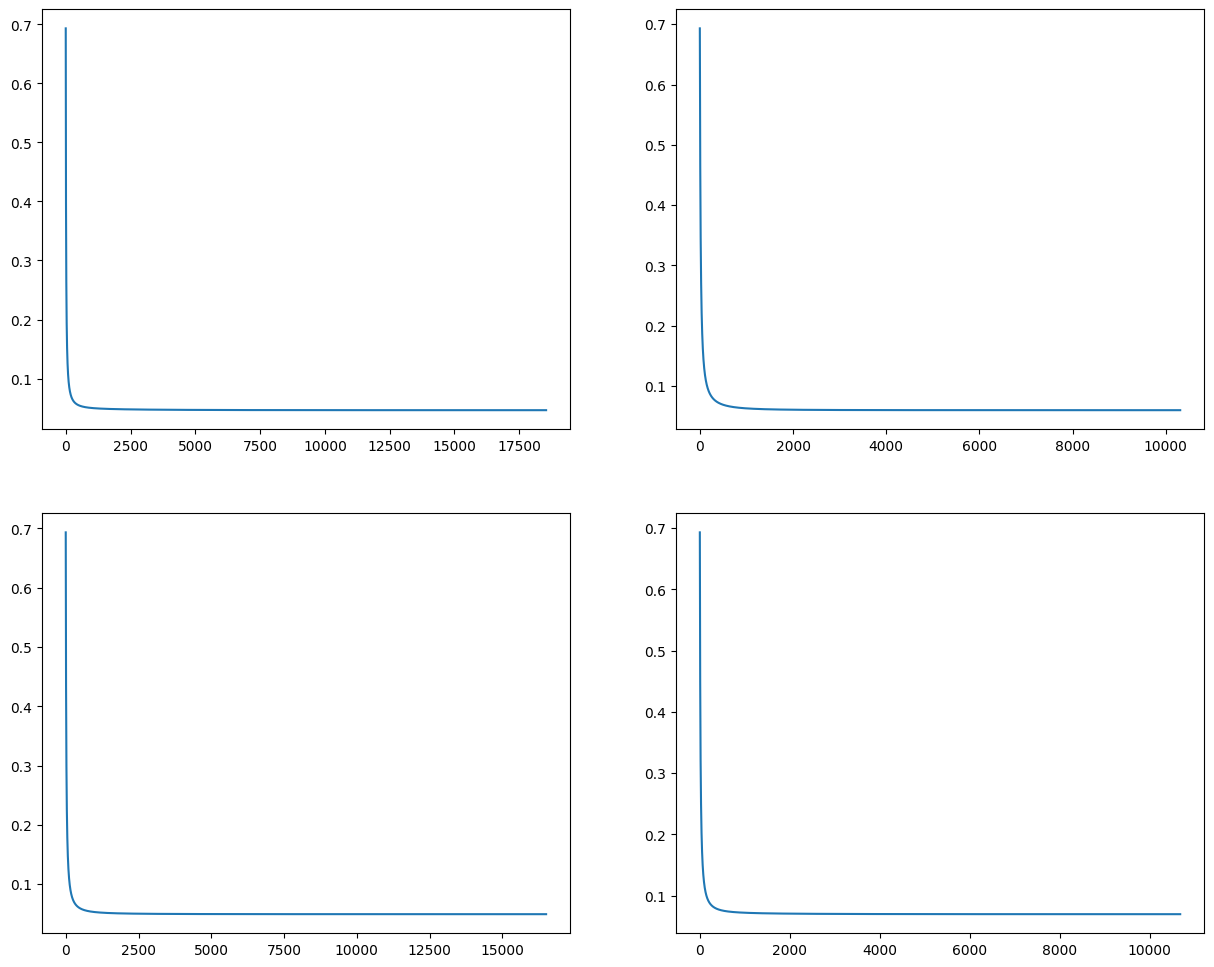

In [264]:
fig, ax = plt.subplots(2,2, figsize=(15,12))

ax[0,0].plot(range(len(cost1)), cost1)
ax[0,1].plot(range(len(cost2)), cost2)
ax[1,0].plot(range(len(cost3)), cost3)
ax[1,1].plot(range(len(cost4)), cost4)

In [265]:
W_all = np.array([W1, W2, W3, W4])
b_all = np.array([[b1, b2, b3, b4]]).T

W_all = W_all / np.std(x_train)
b_all
print(W1)


[ 0.83997299 -1.7633869   1.48366994 -0.05766783  1.11276886 -0.78856813
 -1.21938552]


In [266]:
print(W_all)
print(W_all.shape)
print(b_all)
print(b_all.shape)


[[ 0.8402356  -1.76393822  1.4841338  -0.05768586  1.11311676 -0.78881468
  -1.21976675]
 [ 2.17459612  1.92005905  0.98122218 -1.27557406 -2.06240909  0.67442338
   0.38955326]
 [-1.52323768 -1.69790132 -1.76582573 -0.48698713 -0.8510115   0.35110948
   1.44843848]
 [-1.8639707   1.40853355  0.35403973  1.13244664  1.69125378  0.38334909
  -0.01922344]]
(4, 7)
[[-3.58208911]
 [-2.60528395]
 [-3.74754144]
 [-2.54125231]]
(4, 1)


In [267]:
means = np.array(means)  # shape (7,)
stds = np.array(stds)    # shape (7,)

W_denorm = W_all / stds
b_denorm = b_all - np.dot(W_all, means / stds).reshape(4, 1)

In [268]:

x_test = np.array([[354.280086, -4.541837, 5.702, -497.235066, 618.220213, -5.231721, 964.219853]]).T
print(x_test.shape)

y_predict = model(W_denorm, b_denorm, x_test)
print(houses[np.argmax(y_predict)])


(7, 1)
Gryffindor


In [292]:
test

,Hogwarts House,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration
0,Ravenclaw,-487.886086,5.727180,4.722,272.035831,532.484226,5.231058,1039.788281
1,Slytherin,-552.060507,-5.987446,-5.612,-487.340557,367.760303,4.107170,1058.944592
2,Ravenclaw,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348
3,Gryffindor,697.742809,-6.497214,4.026,-537.001128,523.982133,-4.809637,920.391449
4,Gryffindor,436.775204,-7.820623,2.236,-444.262537,599.324514,-3.444377,937.434724
...,...,...,...,...,...,...,...,...
1595,Gryffindor,354.280086,-4.541837,5.702,-497.235066,618.220213,-5.231721,964.219853
1596,Slytherin,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366
1597,Gryffindor,544.018925,-3.203269,6.065,-385.150457,635.211486,-5.984257,953.866685
1598,Hufflepuff,453.676219,3.442831,6.738,-831.741123,383.444937,3.813111,1087.949205


In [293]:
x_validate = np.array(test.iloc[:, 1:])
x_validate = x_validate.T
y_validate = test["Hogwarts House"]

print(x_validate.shape)
print(y_validate.shape)

(7, 1600)
(1600,)


In [297]:
def validate(W, b, X, v):
    y_predict = model(W, b, X)
    predicted_idx = np.argmax(y_predict, axis=0)
    
    count = 0
    for i, k in enumerate(predicted_idx):
        if (houses[k] == v[i]):
            count += 1
    
    accuracy = count * 100 / len(predicted_idx)
    print(f"The accuracy is {accuracy:.2f}")


validate(W_denorm, b_denorm, x_validate, y_validate)

The accuracy is 98.19
